In [1]:
'https://zhuanlan.zhihu.com/p/546875698'

'https://zhuanlan.zhihu.com/p/546875698'

In [2]:
import config
import os.path as op
from utils.data import CNNDataset
from utils.data import DataLoad
from utils.utils import *

data = DataLoad(config.IMAGE_WIDTH, config.IMAGE_HEIGHT, config.train_val_years, config.test_years, config.trainer1['target'], config.trainer1['path'], config.trainer1['batch_size'])
[train_loader, val_loader, test_loader] = data.main()

------------Data Processing-------------
-------------get_dataloader-------------


In [3]:
[x_train, x_val, y_train, y_val, images_test, label_test] = data.processing_data()

In [4]:
model = torch.load("./cnn_model/trainer1_ret_20_classification_model_stat_checkpoint.pt")

In [5]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
device_ids=range(torch.cuda.device_count())
model.cuda(device=device_ids[3])

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 3), stride=(3, 1), padding=(12, 1), dilation=(2, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPool2d(kernel_size=(2, 1), stride=(3, 1), padding=0, dilation=(2, 1), ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 3), stride=(1, 1), padding=(2, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPool2d(kernel_size=(2, 1), stride=(1, 1), padding=0, dilation=(1, 1), ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 3), stride=(1, 1), padding=(0, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPool2d(kernel_size=(2, 1), st

In [6]:
from utils.utils import grad_cam_plot

In [7]:
randex_down = label_test[label_test[config.trainer1['target']] == 0].sample(10, random_state=0).index
images_down = images_test[[randex_down]] 

randex_up = label_test[label_test[config.trainer1['target']] == 1].sample(10, random_state=0).index
images_up = images_test[[randex_up]] 

### draw a conclusion figure

/tmp/ipykernel_726244/3142710706.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 10, i)


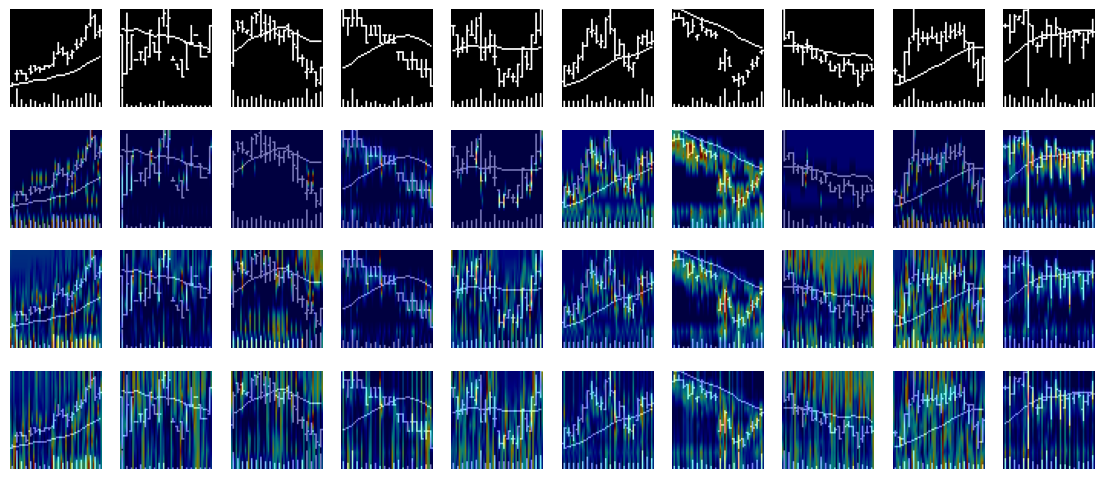

In [8]:
fig = plt.figure(figsize=(14, 6))
plt.title("down")
for i in range(1, 11):
    plt.subplot(4, 10, i)
    plt.imshow(images_down[0][i-1], cmap='Greys_r')
    plt.axis('off')
    
for i in range(11, 21):
    plt.subplot(4, 10, i)
    result = grad_cam_plot(model, 1, images_down[0][i-11])
    plt.imshow(result)
    plt.axis('off')
    
for i in range(21, 31):
    plt.subplot(4, 10, i)
    result = grad_cam_plot(model, 2, images_down[0][i-11-10])
    plt.imshow(result)
    plt.axis('off')
    
for i in range(31, 41):
    plt.subplot(4, 10, i)
    result = grad_cam_plot(model, 3, images_down[0][i-11-10-10])
    plt.imshow(result)
    plt.axis('off')

fig.show()
fig.savefig("./reports/figures/down_sample_10.jpg")

/tmp/ipykernel_726244/3837489767.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 10, i)


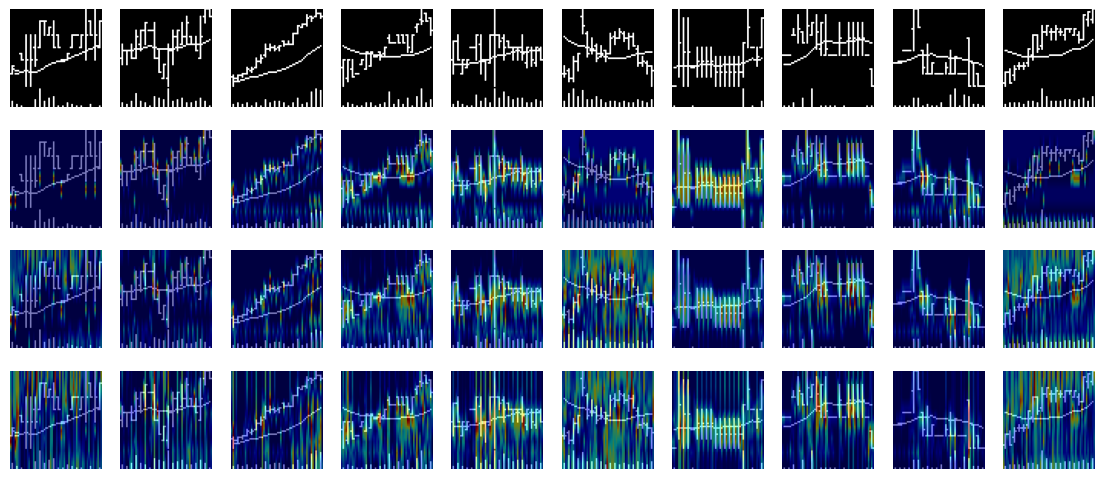

In [9]:
fig = plt.figure(figsize=(14, 6))
plt.title("up")
for i in range(1, 11):
    plt.subplot(4, 10, i)
    plt.imshow(images_up[0][i-1], cmap='Greys_r')
    plt.axis('off')
    
for i in range(11, 21):
    plt.subplot(4, 10, i)
    result = grad_cam_plot(model, 1, images_up[0][i-11])
    plt.imshow(result)
    plt.axis('off')
    
for i in range(21, 31):
    plt.subplot(4, 10, i)
    result = grad_cam_plot(model, 2, images_up[0][i-11-10])
    plt.imshow(result)
    plt.axis('off')
    
for i in range(31, 41):
    plt.subplot(4, 10, i)
    result = grad_cam_plot(model, 3, images_up[0][i-11-10-10])
    plt.imshow(result)
    plt.axis('off')

fig.show()
fig.savefig("./reports/figures/up_sample_10.jpg")